# BODY PERFORMANCE PREDICTION USING MACHINE LEARNING CLASSIFIERS

## 1. Introduction

In today's world, where health and fitness are given utmost importance, the project "Body Performance Prediction Using Machine Learning Classifiers" aims to revolutionize the way we understand and optimize our physical performance. By harnessing the power of machine learning and predictive analytics, this project seeks to provide athletes, trainers, and medical practitioners with valuable insights into the factors influencing body performance outcomes. With the help of Python and Jupyter libraries, we will follow the CRISP-DM methodology to develop a model that not only predicts body performance but also offers a comprehensive analysis of the data, empowering users to make informed decisions for better results.

Imagine being an athlete striving for peak performance in a specific sport. You put in countless hours of training, monitor your diet meticulously, and fine-tune your techniques. However, wouldn't it be incredible if you could gain deeper insights into what truly drives your performance? What if you could uncover hidden patterns, discover the most influential factors, and accurately predict your future performance outcomes? This is precisely what our project aims to accomplish.

By leveraging classification algorithms, we will analyze a diverse range of attributes that impact body performance. Consider attributes such as age, height, weight, blood pressure level, body fat, and previous performance records etc. These factors intertwine in complex ways, and our project seeks to unravel these intricate relationships to shed light on what truly makes a difference in achieving optimal performance.

## 2. Business Understanding

### 2.1 Background

In recent years, there has been a growing interest in health and fitness, and people are increasingly turning to technology to track and optimize their performance. Due to the competitive sports landscape, athletes constantly strive for improved performance and better results. Even general people are also highly conscious about their fitness status. They invest significant time and effort in training, nutrition, and recovery to achieve their goals. However, there is often a lack of comprehensive understanding of the factors that truly impact body performance. To address this gap, the project "Body Performance Prediction Using Machine Learning Classifiers" aims to provide athletes, trainers, and medical practitioners with data-driven insights and predictions to optimize performance outcomes.

Traditionally, performance analysis has relied on subjective observations and limited data. Athletes, coaches and medical practitioners have had to rely on personal experience, trial and error, and intuition to make decisions about training methods, recovery strategies, and overall performance improvement. However, with advancements in technology and the availability of vast amounts of data, there is an opportunity to leverage machine learning and predictive analytics to gain deeper insights into body performance.

## 3. Data Understanding

### 3.1 Data Source



The raw data is available at ‘Korea Sports Promotion Foundation’ website in dataset named [Measurement data for each physical fitness measurement item](https://www.bigdata-culture.kr/bigdata/user/data_market/detail.do?id=ace0aea7-5eee-48b9-b616-637365d665c1). The Dataset provides measurement information for each item of national physical fitness measurement data managed by the National Sports Promotion Foundation in commemoration of the Seoul Olympics. The dataset contains multiple
attributes related to fitness measurement item, such as the name of the fitness center, age group,height, weight, sit-up, BMI, and long jump in place.

For our project we will be using partially filtered and processed dataset that has been extracted from this raw dataset, which is available at Kaggle Data repository under name [Body performance Data](https://www.kaggle.com/datasets/kukuroo3/body-performance-data).

### 3.2 Data Description

**Rows:** 13393 records
<br>**Columns:** 12 Attributes
<br>**Format:** .csv file
<br>**Type:**  10 Attributes - Numerical Data
<br>$\;\;\;\;\;\;\;\;$ 2 Attributes - Categorical Data
<br> **Attributes:**
<br>$\;\;\;\;\;\;\;\;$age : 20~64
<br>$\;\;\;\;\;\;\;\;$gender : F,M
<br>$\;\;\;\;\;\;\;\;$height_cm
<br>$\;\;\;\;\;\;\;\;$weight_kg
<br>$\;\;\;\;\;\;\;\;$body fat_%
<br>$\;\;\;\;\;\;\;\;$diastolic : diastolic blood pressure (min)
<br>$\;\;\;\;\;\;\;\;$systolic : systolic blood pressure (min)
<br>$\;\;\;\;\;\;\;\;$gripForce
<br>$\;\;\;\;\;\;\;\;$sit and bend forward_cm
<br>$\;\;\;\;\;\;\;\;$sit-ups counts
<br>$\;\;\;\;\;\;\;\;$broad jump_cm
<br>$\;\;\;\;\;\;\;\;$class : A,B,C,D ( A: best) / stratified


### 3.3 Exploring Data

In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
import seaborn as sns

## Machine Learning Algorithm
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

## For Evaluation Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

## Export model
import pickle

In [ ]:
#Loading data

data = pd.read_csv(bodyPerformance.csv)
df = pd.DataFrame(data)

The dataset contains 13393 rows with 12 columns of variables.

In [ ]:
#Displaying the shape of the dataset

df.shape

(13393, 12)

In [ ]:
# Displaying the first 20 rows of the dataset

df.head(20)

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0   27.0    M      172.3      75.24       21.3       80.0       130.0    
1   25.0    M      165.0      55.80       15.7       77.0       126.0    
2   31.0    M      179.6      78.00       20.1       92.0       152.0    
3   32.0    M      174.5      71.10       18.4       76.0       147.0    
4   28.0    M      173.8      67.70       17.1       70.0       127.0    
5   36.0    F      165.4      55.40       22.0       64.0       119.0    
6   42.0    F      164.5      63.70       32.2       72.0       135.0    
7   33.0    M      174.9      77.20       36.9       84.0       137.0    
8   54.0    M      166.8      67.50       27.6       85.0       165.0    
9   28.0    M      185.0      84.60       14.4       81.0       156.0    
10  42.0    M      169.2      65.40       19.3       63.0       110.0    
11  57.0    F      153.0      49.00       20.9       69.0       106.0    
12  27.0    F      156.0      53.90       35.5       69.0       116.0    
13  22.0    M      175.7      67.90       11.3       71.0       103.0    
14  24.0    M      181.0      84.40       20.4       80.0       120.0    
15  45.0    F      159.0      63.10       30.9       93.0       144.0    
16  25.0    F      164.2      66.60       30.2       82.0       120.0    
17  26.0    M      179.9      71.50        9.7       64.0       135.0    
18  26.0    M      169.2      70.60       21.0       63.0       129.0    
19  21.0    F      162.7      47.20       18.9       78.0       133.0    

    gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0     54.9              18.4                 60.0           217.0        C   
1     36.4              16.3                 53.0           229.0        A   
2     44.8              12.0                 49.0           181.0        C   
3     41.4              15.2                 53.0           219.0        B   
4     43.5              27.1                 45.0           217.0        B   
5     23.8              21.0                 27.0           153.0        B   
6     22.7               0.8                 18.0           146.0        D   
7     45.9              12.3                 42.0           234.0        B   
8     40.4              18.6                 34.0           148.0        C   
9     57.9              12.1                 55.0           213.0        B   
10    43.5              16.0                 68.0           211.0        A   
11    21.5              30.0                  0.0            90.0        D   
12    23.1              13.1                 28.0           144.0        C   
13    52.5              19.2                 55.0           232.0        C   
14    48.9               7.2                 54.0           213.0        C   
15    34.1              19.0                 30.0           155.0        A   
16    25.7              22.9                 39.0           178.0        C   
17    59.6              17.8                 61.0           239.0        A   
18    41.3              15.1                 53.0           225.0        B   
19    25.4              20.5                 36.0           137.0        B

Looking at the table below, all numeric variables are float data type and the categorical variable are object data type.

In [ ]:
# Displaying the column names and their data types

df.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

The statistics below describes the distribution of the data for each variable and would be visualized with histrogram in Data Visualization section.

In [ ]:
#  Displaying basic statistics for each column

df.describe(include='all')

age     gender    height_cm     weight_kg    body fat_%   \
count   13393.000000  13393  13393.000000  13393.000000  13393.000000   
unique           NaN      2           NaN           NaN           NaN   
top              NaN      M           NaN           NaN           NaN   
freq             NaN   8467           NaN           NaN           NaN   
mean       36.775106    NaN    168.559807     67.447316     23.240165   
std        13.625639    NaN      8.426583     11.949666      7.256844   
min        21.000000    NaN    125.000000     26.300000      3.000000   
25%        25.000000    NaN    162.400000     58.200000     18.000000   
50%        32.000000    NaN    169.200000     67.400000     22.800000   
75%        48.000000    NaN    174.800000     75.300000     28.000000   
max        64.000000    NaN    193.800000    138.100000     78.400000   

          diastolic     systolic      gripForce   sit and bend forward_cm  \
count   13393.000000  13393.000000  13393.000000       13393.000000         
unique           NaN           NaN           NaN                NaN         
top              NaN           NaN           NaN                NaN         
freq             NaN           NaN           NaN                NaN         
mean       78.796842    130.234817     36.963877          15.209268         
std        10.742033     14.713954     10.624864           8.456677         
min         0.000000      0.000000      0.000000         -25.000000         
25%        71.000000    120.000000     27.500000          10.900000         
50%        79.000000    130.000000     37.900000          16.200000         
75%        86.000000    141.000000     45.200000          20.700000         
max       156.200000    201.000000     70.500000         213.000000         

        sit-ups counts  broad jump_cm class   
count    13393.000000   13393.000000   13393  
unique            NaN            NaN       4  
top               NaN            NaN       C  
freq              NaN            NaN    3349  
mean        39.771224     190.129627     NaN  
std         14.276698      39.868000     NaN  
min          0.000000       0.000000     NaN  
25%         30.000000     162.000000     NaN  
50%         41.000000     193.000000     NaN  
75%         50.000000     221.000000     NaN  
max         80.000000     303.000000     NaN

In [ ]:
# Displaying the Summarized information of the Dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


The data is fairly clean with no missing values, therefore no data imputation or null removal is required for this dataset.

In [ ]:
# Checking for missing values

df.isna().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

When checking for duplicated row, it seems there is only a single duplicated row. This will be removed in the data cleaning section.

In [ ]:
# Checking for Duplicate rows

duplicate = df[df.duplicated()]

print("Duplicate Rows :")

duplicate

Duplicate Rows :


age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
12473  27.0    F      157.0      49.1        30.7       70.0       86.0     

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
12473    27.7              19.7                 51.0           167.0        A

The gender and class variables are the categorical data in the dataset. From the table below, we can see that there are 2 unique labels for gender which should be only male or female. There are also 4 unique labels for class which should be A, B, C and D.

In [ ]:
# Checking for Unique Values

df.nunique()

age                          44
gender                        2
height_cm                   467
weight_kg                  1398
body fat_%                  527
diastolic                    89
systolic                    102
gripForce                   550
sit and bend forward_cm     528
sit-ups counts               81
broad jump_cm               245
class                         4
dtype: int64

This is confirmed by the following code where the unique labels for the categorical variables are checked and displayed. Therefore, the categorical are already consistent and there is no need to format the labels.

In [ ]:
unique_labels_gender = set(df['gender'])
print(unique_labels_gender)

unique_labels_class = set(df['class'])
print(unique_labels_class)

{'M', 'F'}
{'A', 'B', 'C', 'D'}


### 3.4 Data Visualization

In [ ]:
# Average Value of features in terms of Gender

df.groupby("gender").mean()

age      height_cm  weight_kg  body fat_%  diastolic   systolic   \
gender                                                                        
F       37.850995  160.485404  56.905899   28.486085  75.578197  123.986399   
M       36.149167  173.257399  73.580187   20.188151  80.669411  133.870072   

        gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
gender                                                                     
F       25.817994         18.839791            30.888348     153.326025    
M       43.448420         13.097073            44.939176     211.541526

<Axes: xlabel='gender', ylabel='weight_kg'>

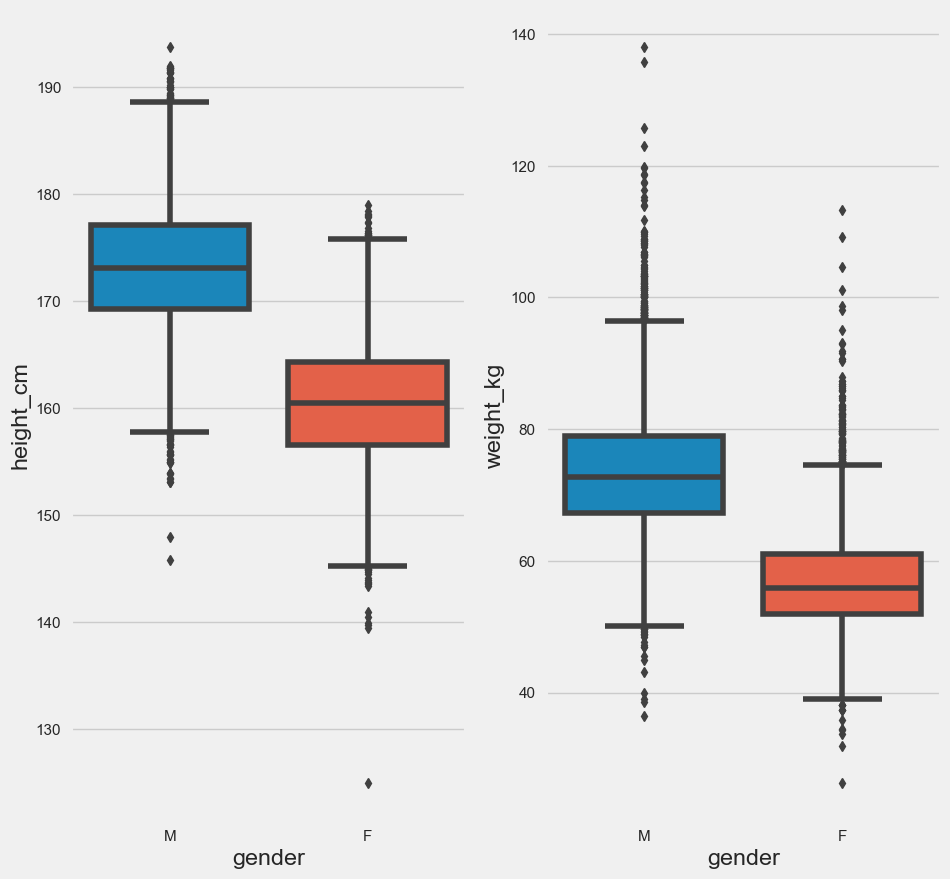

In [ ]:
#Relation of attribute Gender with height and weight

%matplotlib inline
plt.figure(figsize=(10,10))
ax = plt.subplot(1,2,1)
sns.boxplot(x="gender", y="height_cm", data=df, ax=ax)
ax = plt.subplot(1,2,2)
sns.boxplot(x="gender", y="weight_kg", data=df, ax=ax)

**Opinion 1: From the figure above it can be observed that usually Males tend to be taller and heavier than Females.**

<Axes: xlabel='gender', ylabel='gripForce'>

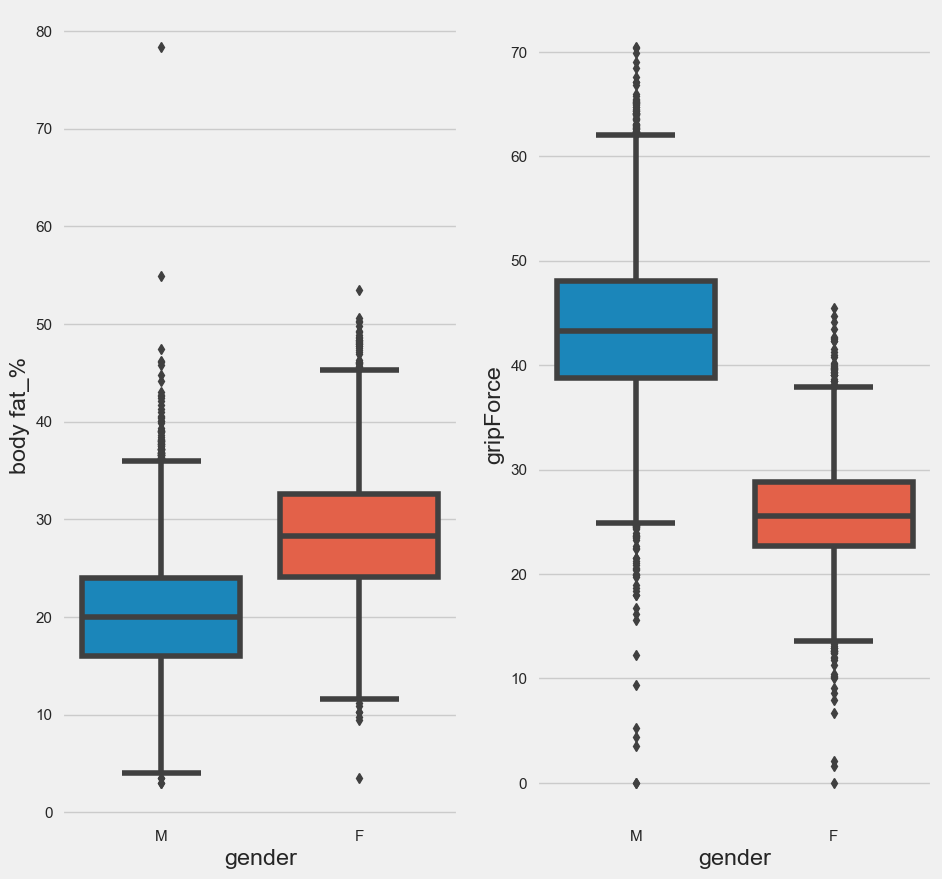

In [ ]:
#Relation of attribute Gender with Body fat and Grip Force

%matplotlib inline

plt.figure(figsize=(10,10))
ax = plt.subplot(1,2,1)
sns.boxplot(x="gender", y="body fat_%", data=df, ax=ax)
ax = plt.subplot(1,2,2)
sns.boxplot(x="gender", y="gripForce", data=df, ax=ax)

**Opinion 2: From the figure above it can be observed that usually Females have slightly higher Body Fat percentage compare to Males, whereas Males tend to have a higher grip force on average compared to Females.**

<Axes: xlabel='gender', ylabel='systolic'>

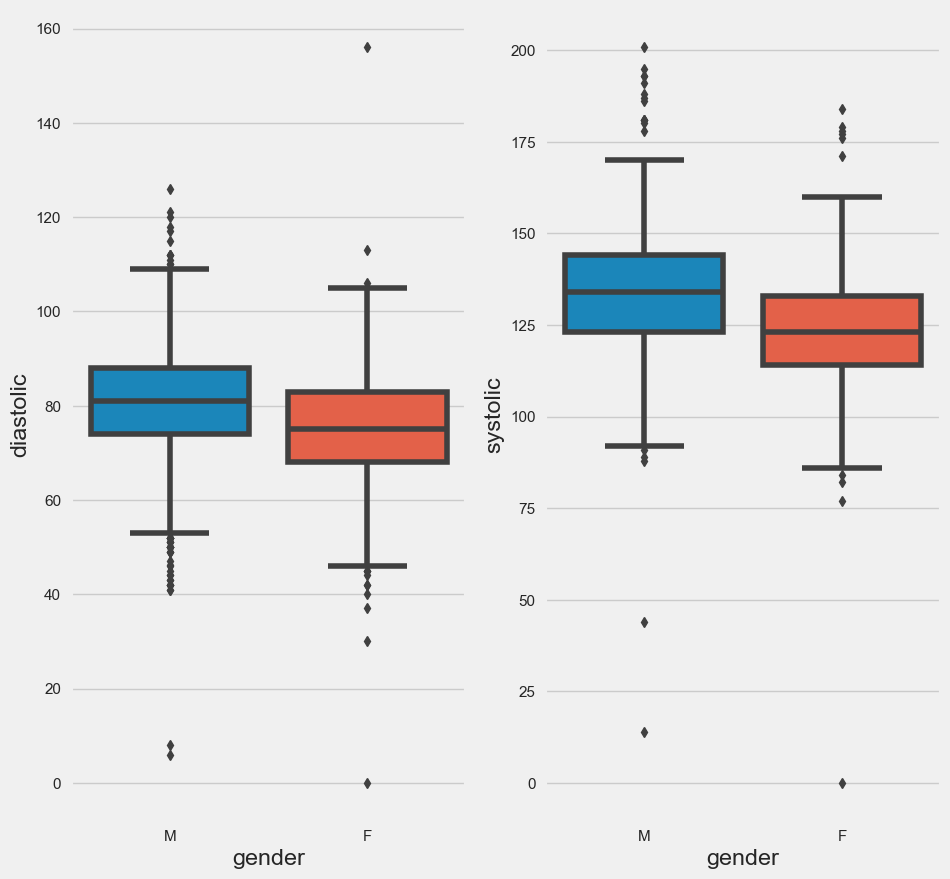

In [ ]:
#Relation of attribute Gender with Blood Pressure

%matplotlib inline

plt.figure(figsize=(10,10))
ax = plt.subplot(1,2,1)
sns.boxplot(x="gender", y="diastolic", data=df, ax=ax)
ax = plt.subplot(1,2,2)
sns.boxplot(x="gender", y="systolic", data=df, ax=ax)

**Opinion 3: From the figure above it can be observed that usually Males tend to have a higher Blood Pressure on average compared to Females.**

<Axes: xlabel='age', ylabel='systolic'>

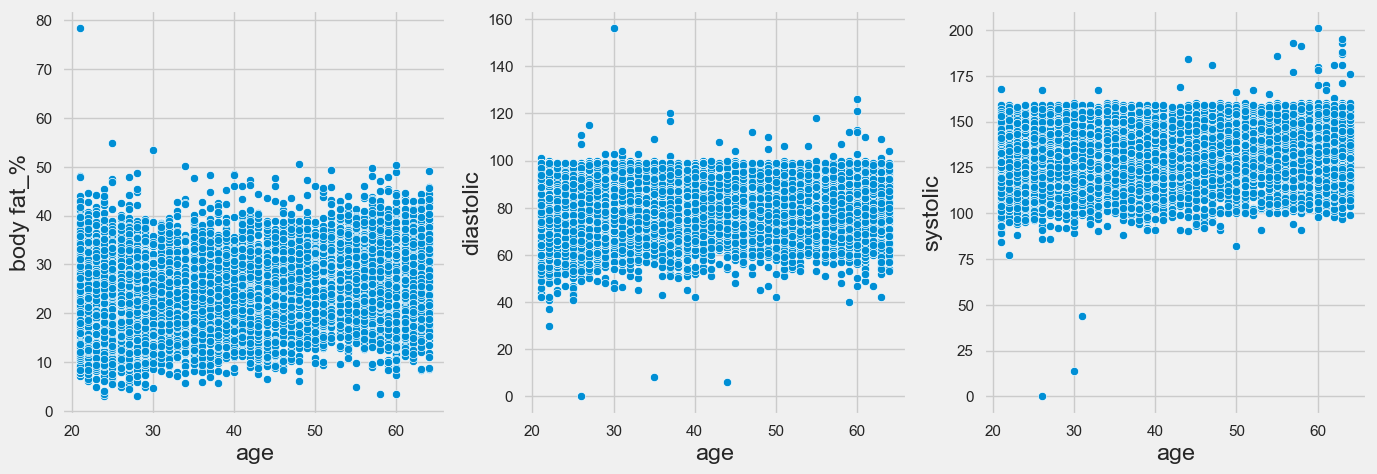

In [ ]:
#Relation of Age with Body fat and Blood Pressure

%matplotlib inline

plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
sns.scatterplot(x="age", y="body fat_%", data=df, ax=ax)
ax = plt.subplot(1,3,2)
sns.scatterplot(x="age", y="diastolic", data=df, ax=ax)
ax = plt.subplot(1,3,3)
sns.scatterplot(x="age", y="systolic", data=df, ax=ax)

**Opinion 4: There is no correlation of Age with Body Fat and Blood Pressure**

<Axes: xlabel='body fat_%', ylabel='broad jump_cm'>

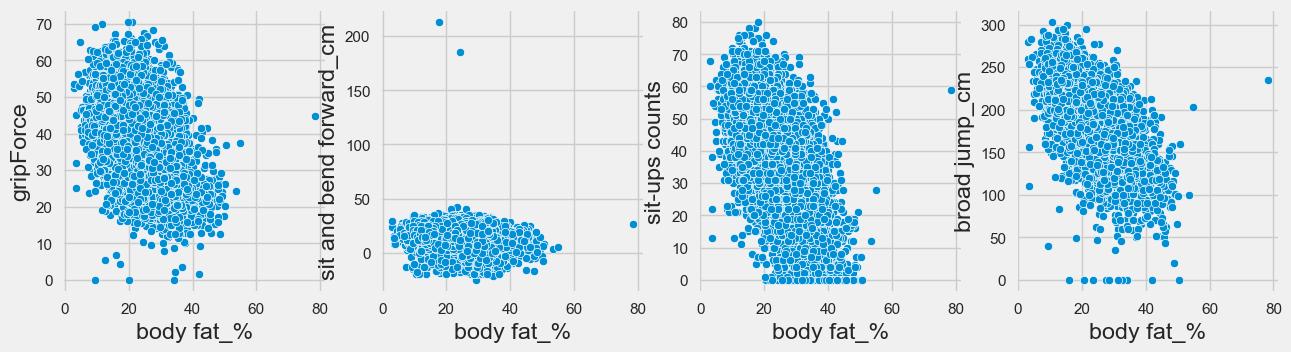

In [ ]:
#Relation of Body fat with Grip Force, Sit and Bend Forward, Situp counts and Broad Jump

%matplotlib inline

plt.figure(figsize=(14,3.5))
ax = plt.subplot(1,4,1)
sns.scatterplot(x="body fat_%", y="gripForce", data=df, ax=ax)
ax = plt.subplot(1,4,2)
sns.scatterplot(x="body fat_%", y="sit and bend forward_cm", data=df, ax=ax)
ax = plt.subplot(1,4,3)
sns.scatterplot(x="body fat_%", y="sit-ups counts", data=df, ax=ax)
ax = plt.subplot(1,4,4)
sns.scatterplot(x="body fat_%", y="broad jump_cm", data=df, ax=ax)

**Opinion 5: There is no correlation between Body Fat and ability to sit and bend forward. However, People with lower body fat percentage tend to have higher grip force, able to do higher amount of sit-ups and cross higher braod jump distance.**

In [ ]:
# Average Value of features in terms of Class

df.groupby("class").mean()

age      height_cm  weight_kg  body fat_%  diastolic   systolic   \
class                                                                        
A      35.268220  167.871027  64.418178   20.539159  77.903345  129.290024   
B      37.074096  168.580311  66.612420   22.039981  78.656468  130.639349   
C      36.699612  169.162168  66.760314   22.644564  78.550672  129.925351   
D      38.058226  168.625530  71.996948   27.735432  80.076530  131.084503   

       gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  
class                                                                     
A      38.615723         21.391777            47.848268     202.744026    
B      37.910436         17.467586            42.639199     195.332566    
C      36.582663         14.390645            38.720215     188.627949    
D      34.747746          7.590260            29.881338     173.820842

<Axes: xlabel='class', ylabel='age'>

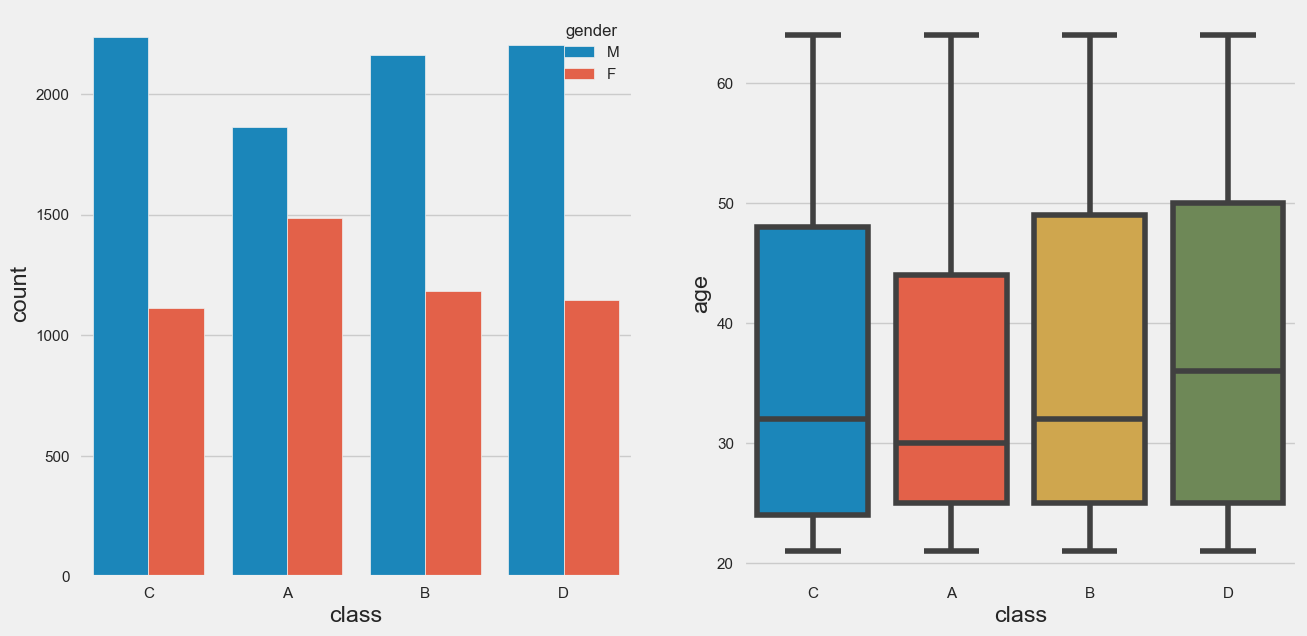

In [ ]:
# Relationship of Class with Age and Gender

%matplotlib inline
plt.figure(figsize=(14,7))
ax = plt.subplot(1,2,1)
sns.countplot(x="class", hue="gender", data=df, ax=ax)
ax = plt.subplot(1,2,2)
sns.boxplot(x="class", y="age", data=df, ax=ax)

**Opinion 6:  As our dataset does not have equal ratio of Male (8467) and Female (4926) record, it cannot be stated whether more males fall under a certain class than females. However, from the 2nd plot, we can see that the average age for class A seems to be lower than the other classes.**

<Axes: xlabel='class', ylabel='broad jump_cm'>

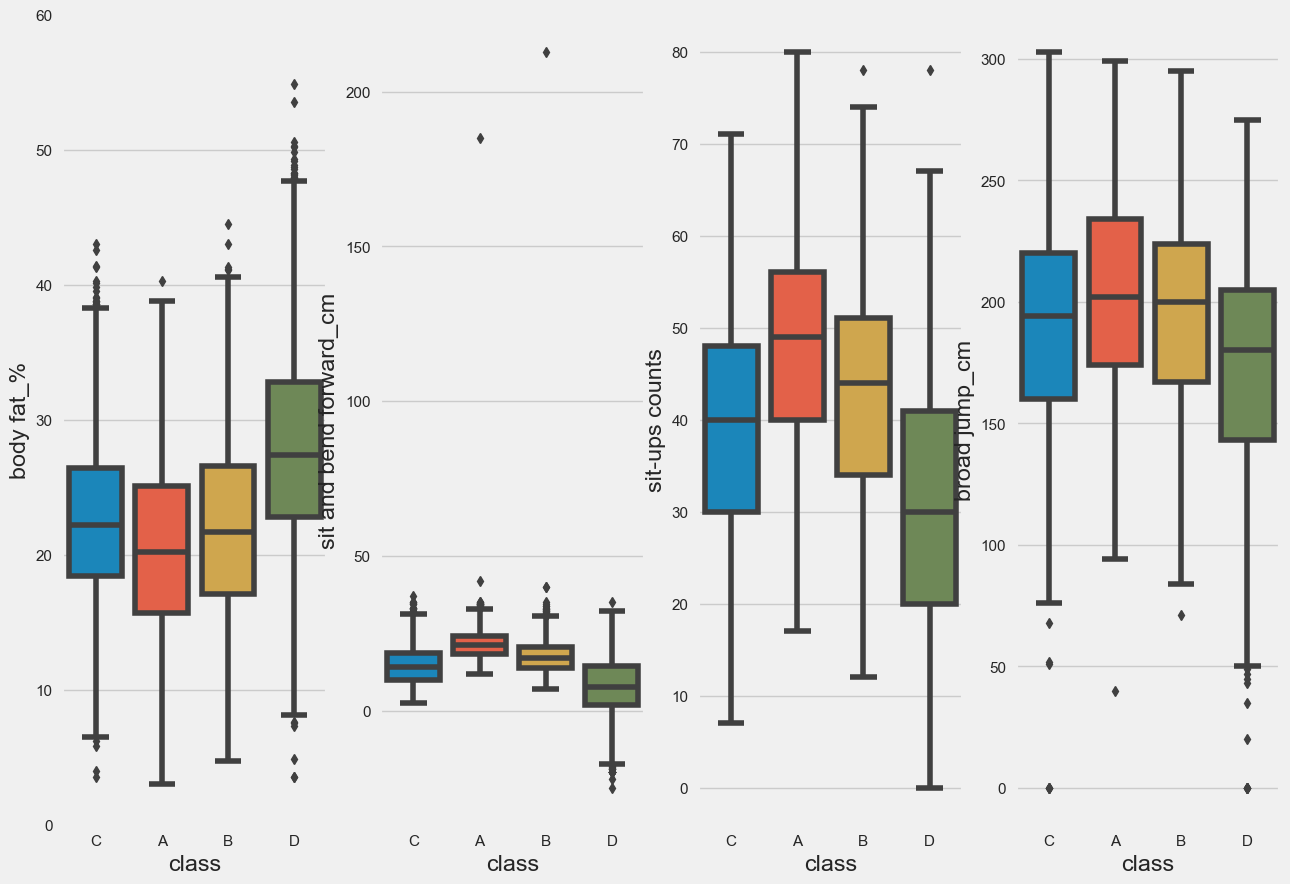

In [ ]:
# Relationship of Class with Body fat, Sit ups, Bendforward and Broad jump

%matplotlib inline
plt.figure(figsize=(14,10))
ax = plt.subplot(1,4,1)
sns.boxplot(x="class", y="body fat_%", data=df, ax=ax)
ax.set(ylim=(0,60))
ax = plt.subplot(1,4,2)
sns.boxplot(x="class", y="sit and bend forward_cm", data=df, ax=ax)
ax = plt.subplot(1,4,3)
sns.boxplot(x="class", y="sit-ups counts", data=df, ax=ax)
ax = plt.subplot(1,4,4)
sns.boxplot(x="class", y="broad jump_cm", data=df, ax=ax)

**Opinion 7: From the figures above, it can be seen that Class A tend to have a lower body fat percentage, able to do more sit ups, bend more forward and able to jump further than the people in other classes.**

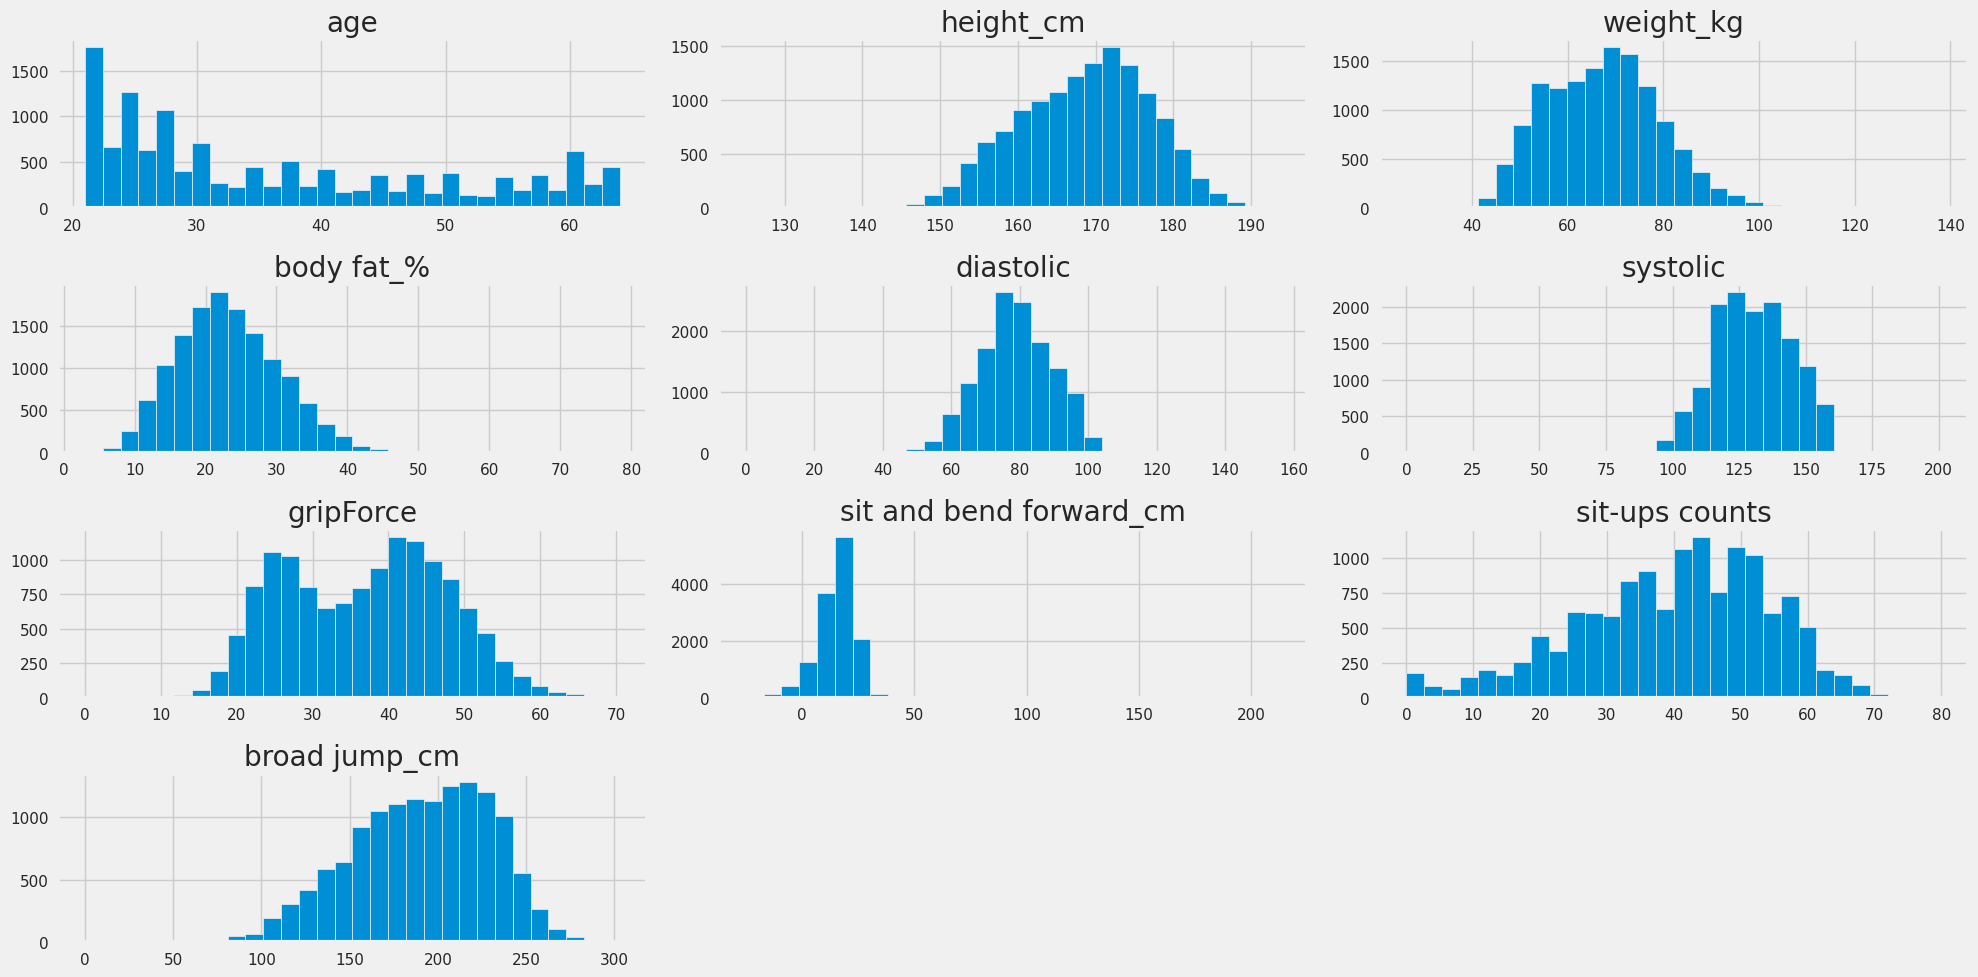

In [ ]:
# Plotting histograms for each numerical variable distribution on one graph

df.hist(bins=30,figsize=(20, 10))
plt.tight_layout()
plt.show()

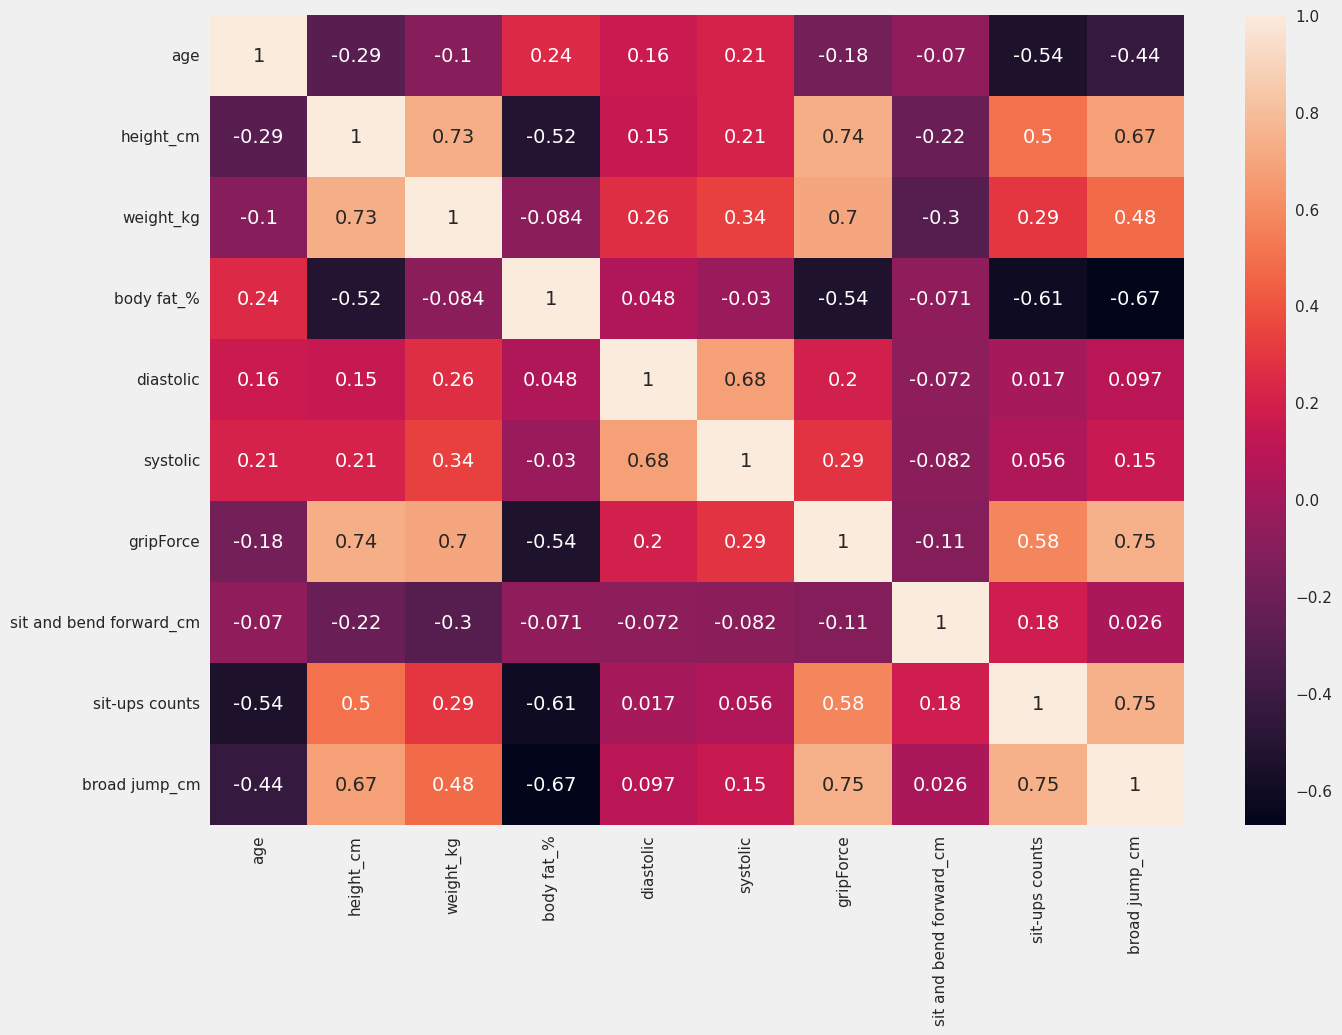

In [ ]:
#Analyzing the correlation between variables using heatmaps

plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Opinion 8: From the correlation matrix above, it can be seen that the body fat has high negative correlation with grip force, sit up counts and broad jumps. It means that as the body fat percentage increases, these variables (grip force, sit-up counts, and broad jumps) tend to decrease. The height and weight also has positive correlation with grip force and broad jump.**

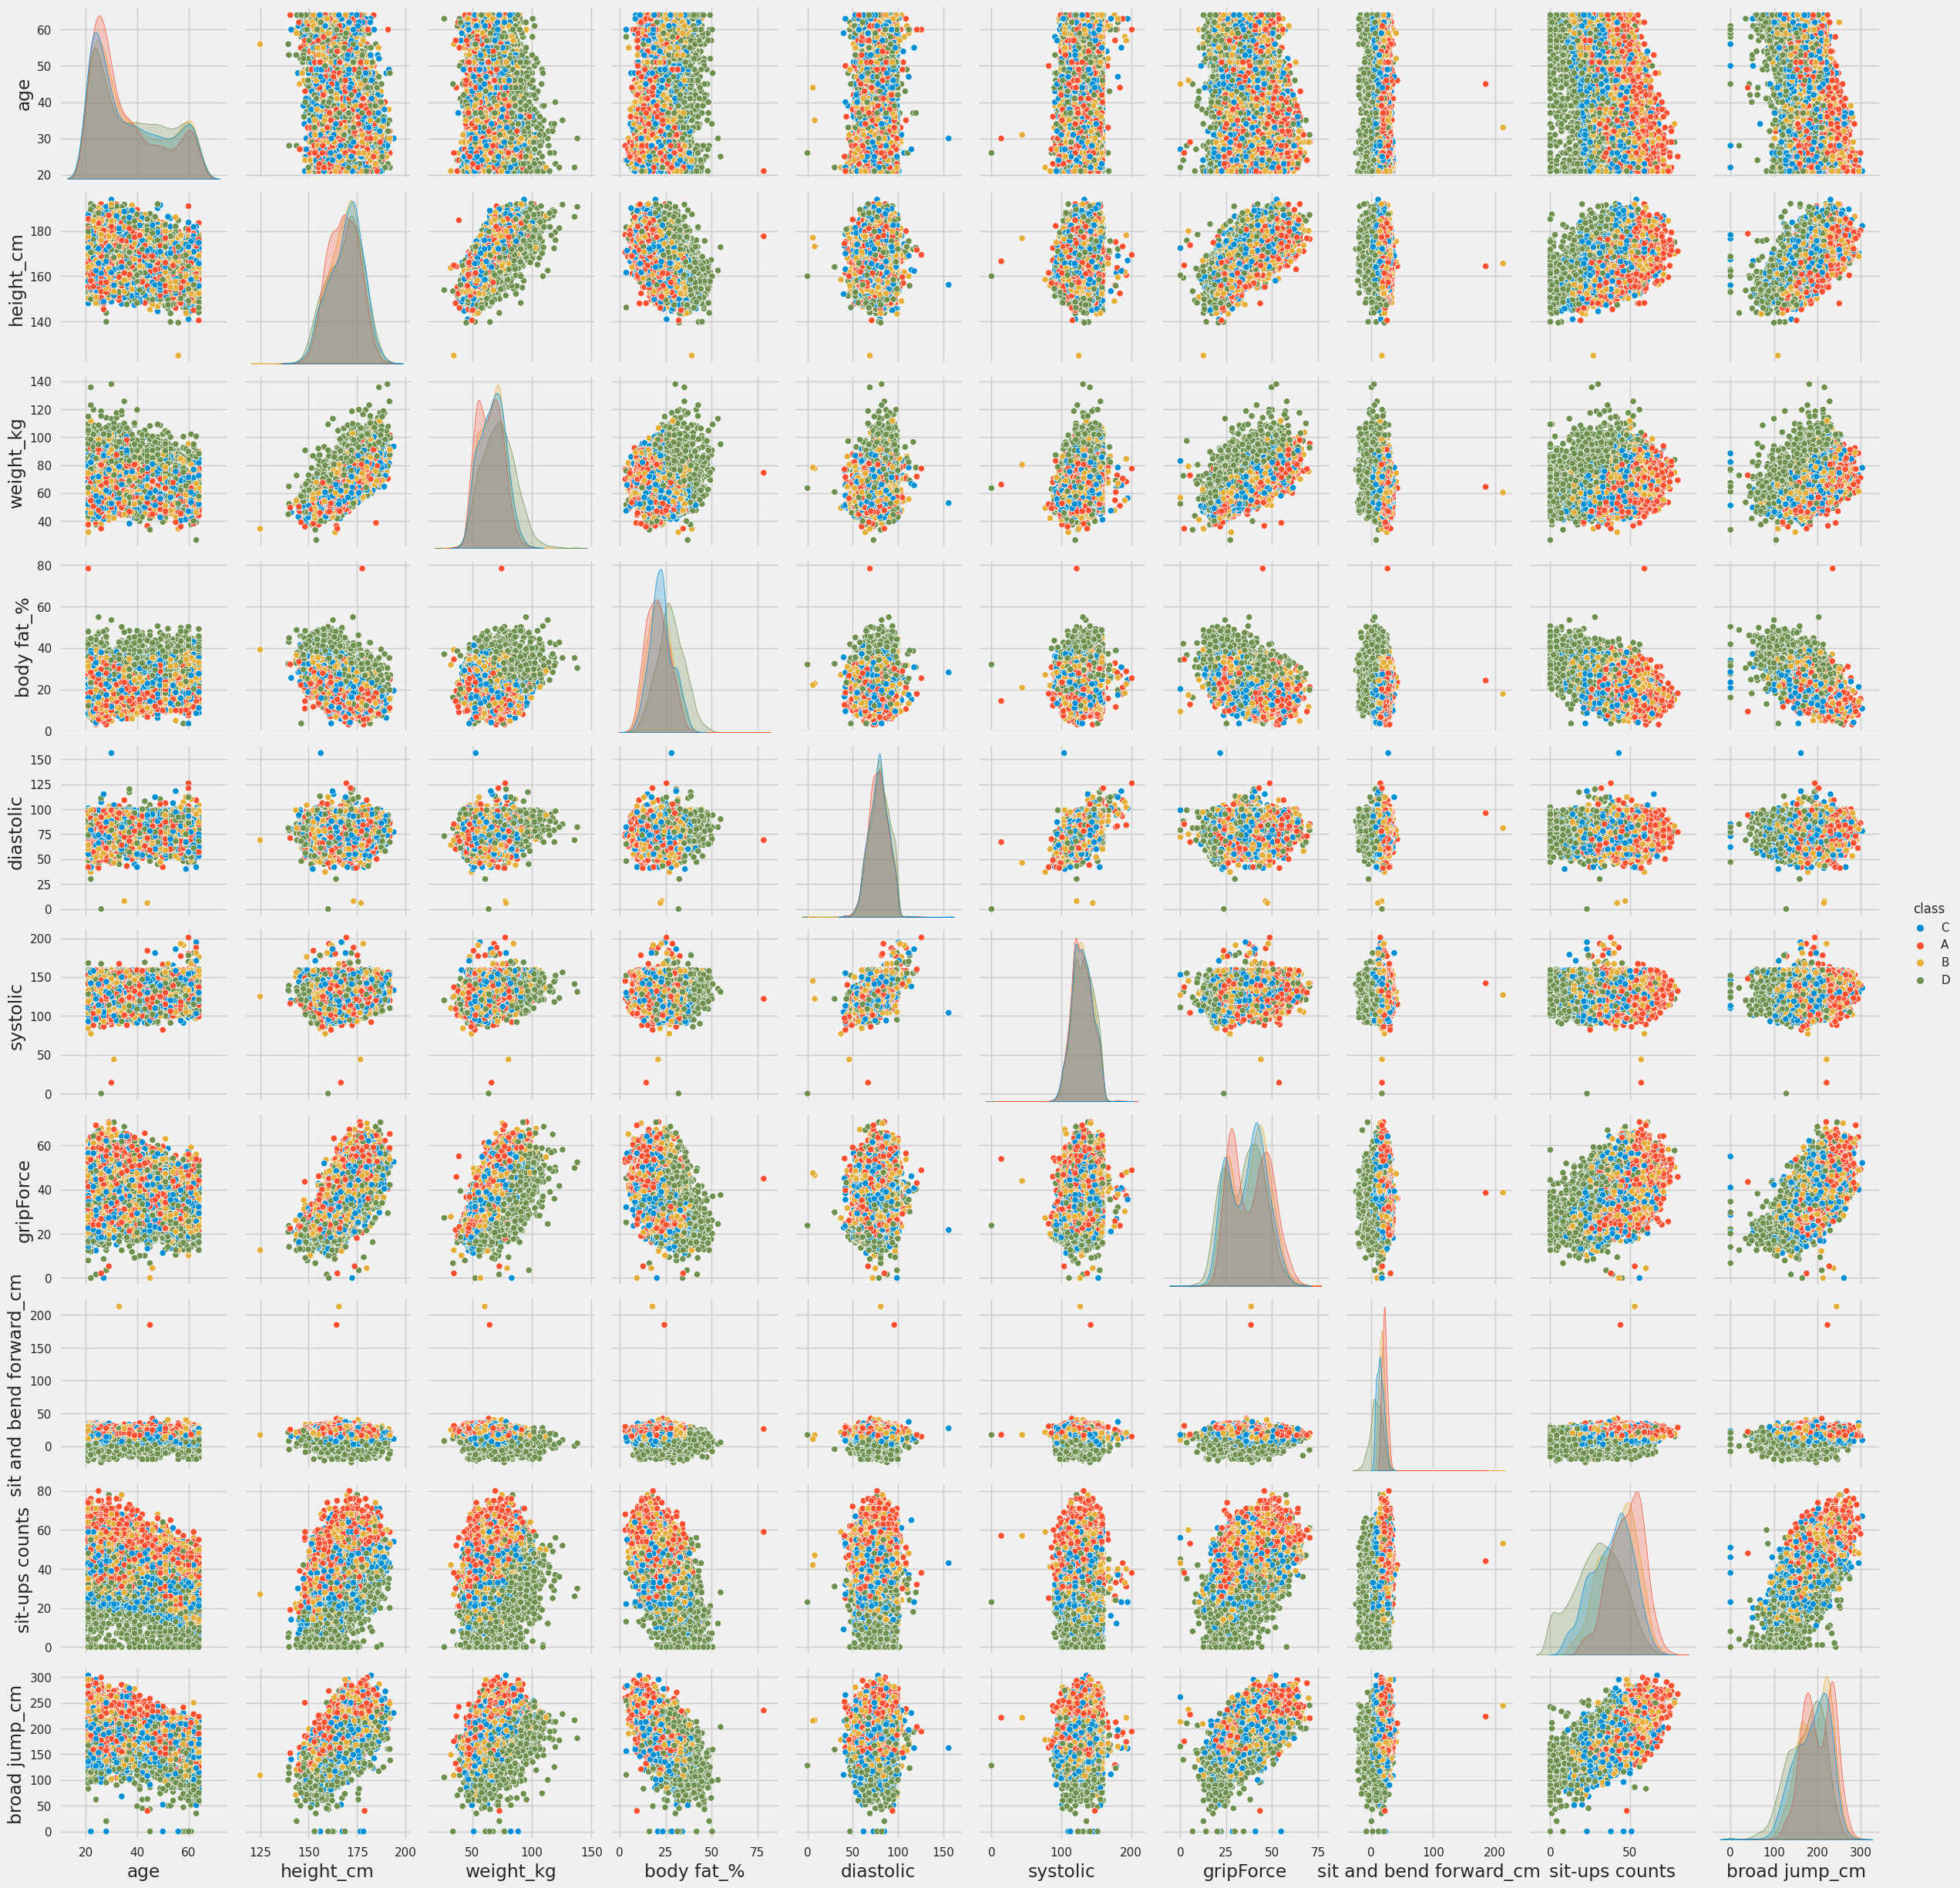

In [ ]:
#Analyzing relationships between pairs of attributes

sns.pairplot(df, hue='class')

**Opinion 9: Class A is represented by red points, we can observe class A has higher grip force, broad jump, sit up counts and sit and bend forward values in generally. We can deduced that class A generally perform better and has better counts and values in these exercises variables than the other classes**


## 4. Data Preparation

In [ ]:
#Creating a copy of the actual dataset

DF=df.copy()
DF.head(10)

age gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0    M      172.3      75.24       21.3       80.0       130.0    
1  25.0    M      165.0      55.80       15.7       77.0       126.0    
2  31.0    M      179.6      78.00       20.1       92.0       152.0    
3  32.0    M      174.5      71.10       18.4       76.0       147.0    
4  28.0    M      173.8      67.70       17.1       70.0       127.0    
5  36.0    F      165.4      55.40       22.0       64.0       119.0    
6  42.0    F      164.5      63.70       32.2       72.0       135.0    
7  33.0    M      174.9      77.20       36.9       84.0       137.0    
8  54.0    M      166.8      67.50       27.6       85.0       165.0    
9  28.0    M      185.0      84.60       14.4       81.0       156.0    

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm class  
0    54.9              18.4                 60.0           217.0        C   
1    36.4              16.3                 53.0           229.0        A   
2    44.8              12.0                 49.0           181.0        C   
3    41.4              15.2                 53.0           219.0        B   
4    43.5              27.1                 45.0           217.0        B   
5    23.8              21.0                 27.0           153.0        B   
6    22.7               0.8                 18.0           146.0        D   
7    45.9              12.3                 42.0           234.0        B   
8    40.4              18.6                 34.0           148.0        C   
9    57.9              12.1                 55.0           213.0        B

In [ ]:
# Checking for Null Values and dropping Null Values (if applicable)

DF.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [ ]:
# Checking for Duplicate Rows and dropping Duplicate rows (if applicable)

DF[DF.duplicated()]
DF.drop_duplicates(inplace=True)
DF.shape

(13392, 12)

### 4.1 Data Formatting

The categorical data is formatted into numerical data as in the modelling part, the categorical data would not be able to be used to train the model.

In [ ]:
#Changing categorical variables into numerical variables

DF['class'].replace(['A', 'B','C','D'],[0,1,2,3], inplace=True)
DF['gender'].replace(['M', 'F'],[0,1], inplace=True)
DF.head(10)

age  gender  height_cm  weight_kg  body fat_%  diastolic  systolic  \
0  27.0     0      172.3      75.24       21.3       80.0       130.0    
1  25.0     0      165.0      55.80       15.7       77.0       126.0    
2  31.0     0      179.6      78.00       20.1       92.0       152.0    
3  32.0     0      174.5      71.10       18.4       76.0       147.0    
4  28.0     0      173.8      67.70       17.1       70.0       127.0    
5  36.0     1      165.4      55.40       22.0       64.0       119.0    
6  42.0     1      164.5      63.70       32.2       72.0       135.0    
7  33.0     0      174.9      77.20       36.9       84.0       137.0    
8  54.0     0      166.8      67.50       27.6       85.0       165.0    
9  28.0     0      185.0      84.60       14.4       81.0       156.0    

   gripForce  sit and bend forward_cm  sit-ups counts  broad jump_cm  class  
0    54.9              18.4                 60.0           217.0        2    
1    36.4              16.3                 53.0           229.0        0    
2    44.8              12.0                 49.0           181.0        2    
3    41.4              15.2                 53.0           219.0        1    
4    43.5              27.1                 45.0           217.0        1    
5    23.8              21.0                 27.0           153.0        1    
6    22.7               0.8                 18.0           146.0        3    
7    45.9              12.3                 42.0           234.0        1    
8    40.4              18.6                 34.0           148.0        2    
9    57.9              12.1                 55.0           213.0        1

### 4.2 Remove Outliers

Box plot is plotted for each variables in our dataset and we can see that there are a number of data points that lies outside the whiskeres of the box plot which indicates these values are considered to be outliers from the distribution of the dataset.

<Axes: >

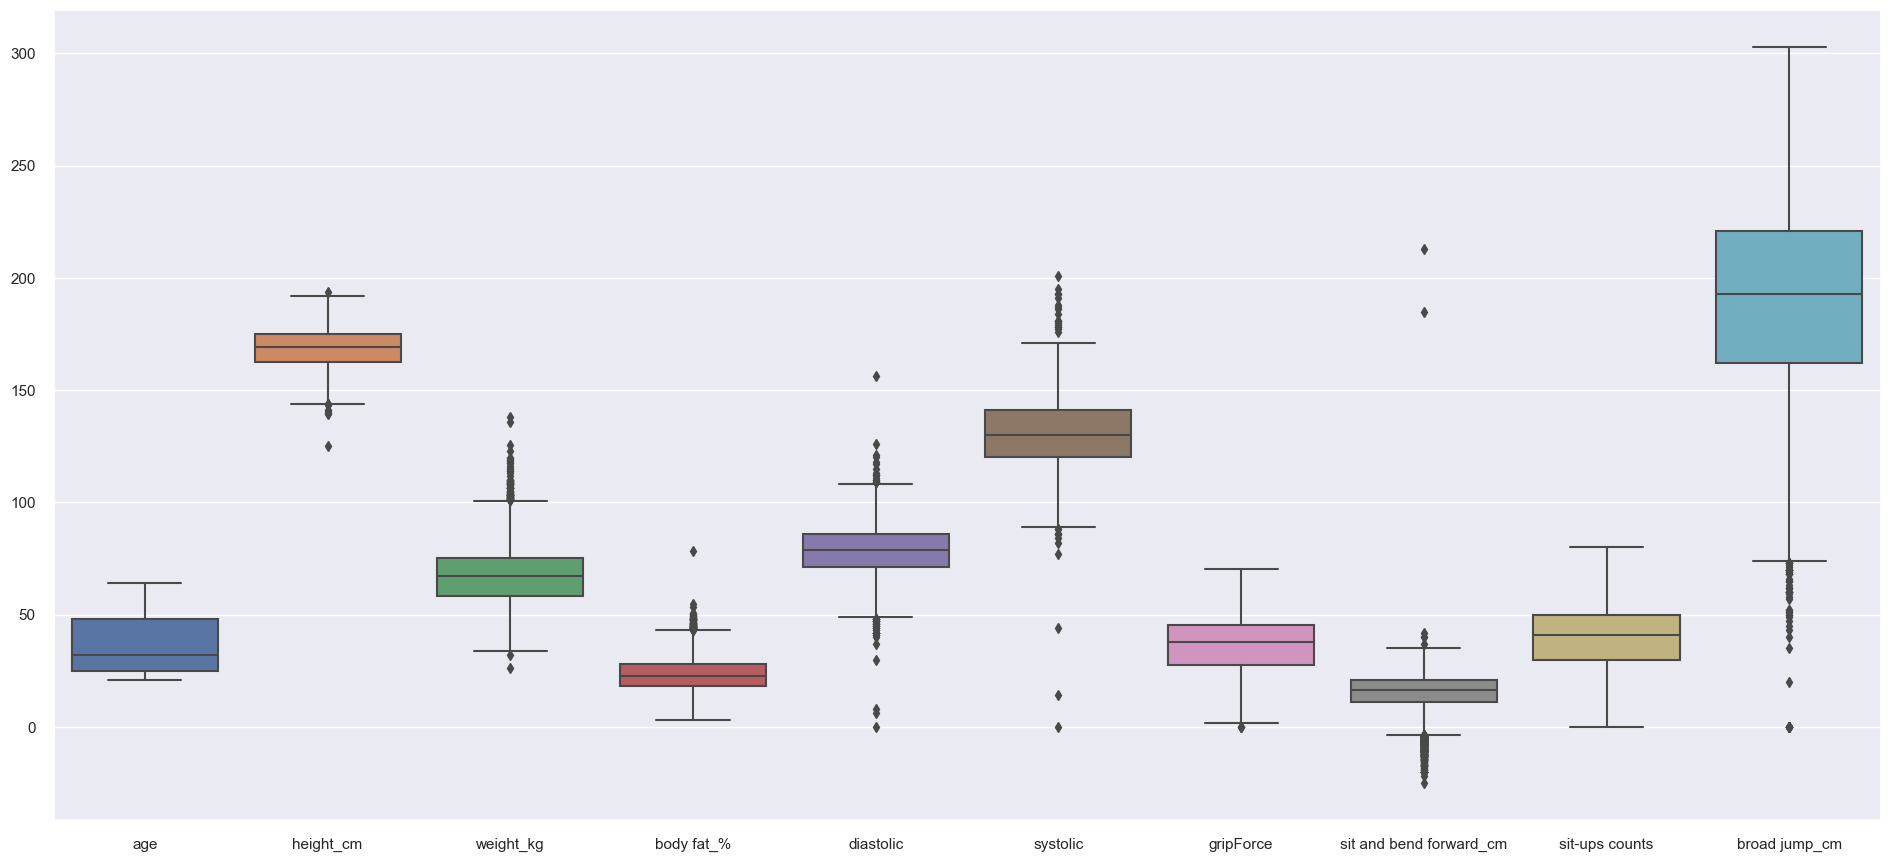

In [ ]:
%matplotlib inline
sns.set(rc={'figure.figsize':(21,10)})
sns.boxplot(data=df.iloc[:,:])

The function calculate the lower bound and upper bound using the product of interquartile range times value of 1.5. The lower bound is determined by subtracting k multiplied by the IQR from the first quartile (25th percentile). The upper bound is calculated by adding k multiplied by the IQR to the third quartile (75th percentile). Only the numeric variables are passed onto the function below. The total number of removed outliers are 699.

In [ ]:
def remove_outliers_iqr(df, columns, k=1.5):
    df_outliers_removed = df.copy()
    ori = len(df)

    for column in columns:
        q1 = df_outliers_removed[column].quantile(0.25)
        q3 = df_outliers_removed[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - k * iqr
        upper_bound = q3 + k * iqr

        df_outliers_removed = df_outliers_removed[
            (df_outliers_removed[column] >= lower_bound) &
            (df_outliers_removed[column] <= upper_bound)
        ]

    print('Number of outliers removed:', ori - len(df_outliers_removed))
    return df_outliers_removed

columns = ['height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']
DF = remove_outliers_iqr(DF, columns)




Number of outliers removed: 699


If we plot the box plot for all the variables, the outliers outside the lower bound and upper bound has been removed.

<Axes: >

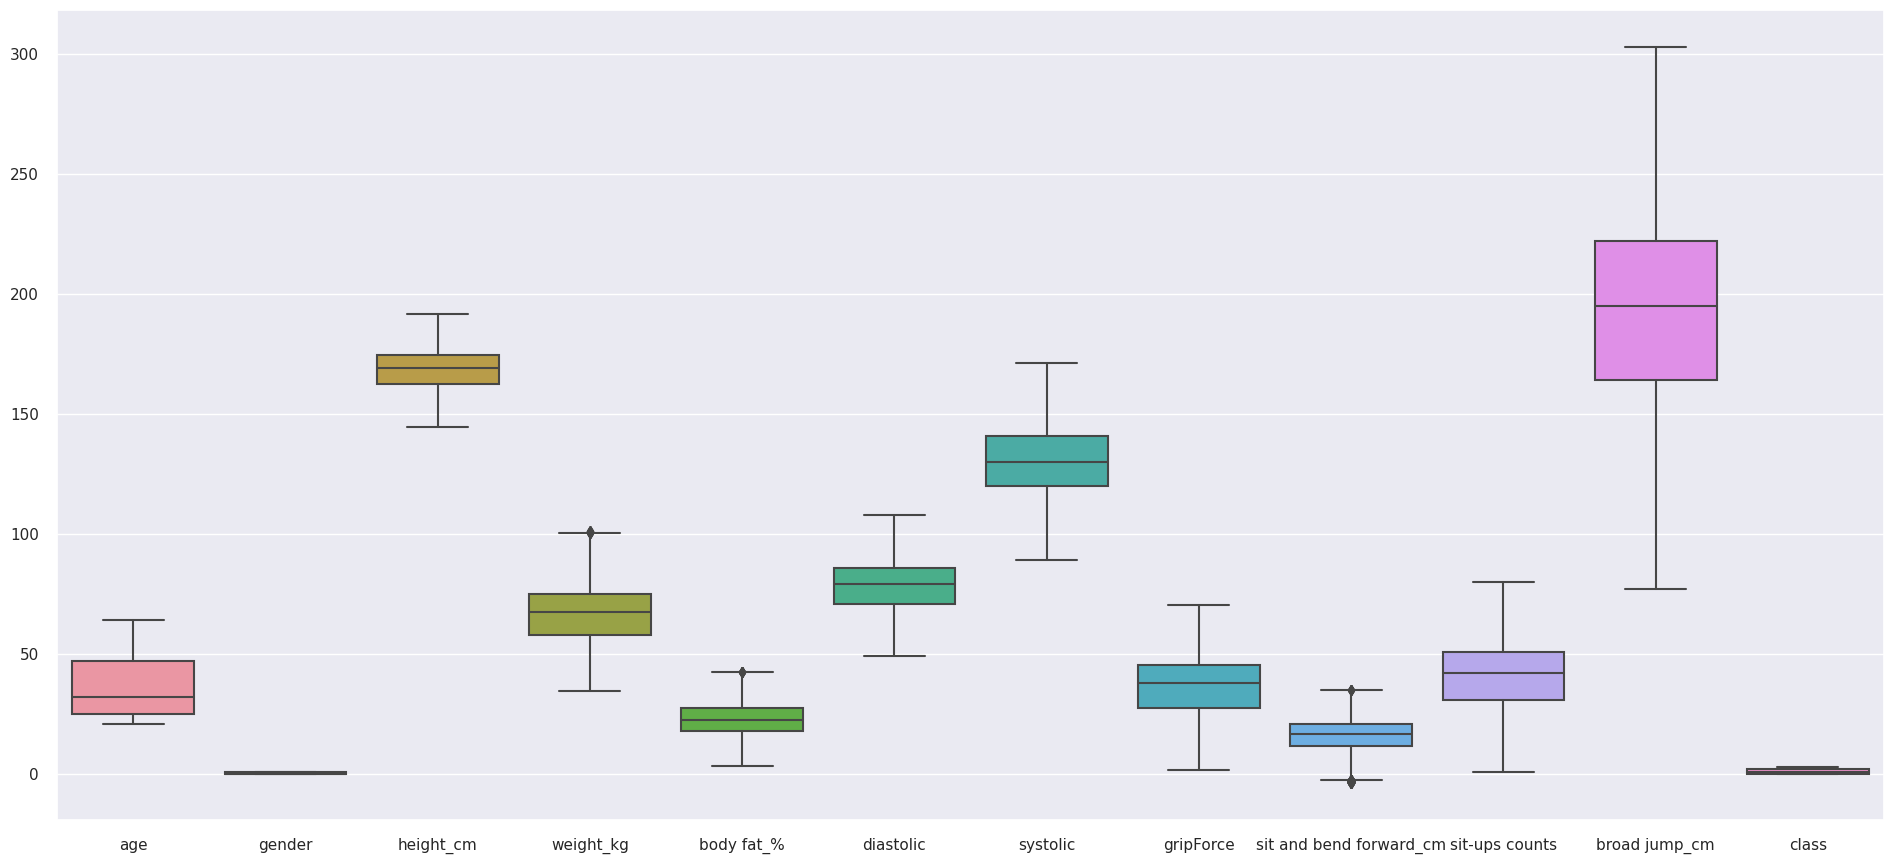

In [ ]:
%matplotlib inline
sns.set(rc={'figure.figsize':(21,10)})
sns.boxplot(data=DF.iloc[:,:])

### 4.3 Normalization

The function normalize below is used to perform data normalization. This calculates the mean and standard deviation from the input and scales the data accordingly. The mean and standard deviation before and after are printed out to show the the data has been normalized using the function.

In [ ]:
# Normalizion/ Standardization

from sklearn.preprocessing import  StandardScaler

def normalize(df, col):
  sc=StandardScaler()
  df_scaled = df.copy()
  for column in columns:
        data = df[column].values.reshape(-1, 1)
        df_scaled[column] = sc.fit_transform(data).flatten()

  print("Mean and Standard Deviation Before:")
  print((df[columns].mean()))
  print(df[columns].std())

  print("Mean and Standard Deviation After:")
  print(df_scaled[columns].mean())
  print(df_scaled[columns].std())

  return df_scaled


In [ ]:
features =  ['age', 'height_cm', 'weight_kg', 'body fat_%',  'diastolic','systolic','gripForce', 'sit and bend forward_cm', 'sit-ups counts','broad jump_cm']

print("Normalization/Standardization:")

DF_final = normalize(DF, features)

Normalization/Standardization:
Mean and Standard Deviation Before:
height_cm                  168.591421
weight_kg                   67.064786
body fat_%                  22.868393
diastolic                   78.788596
systolic                   130.186372
gripForce                   37.159461
sit and bend forward_cm     16.001176
sit-ups counts              40.595157
broad jump_cm              191.948884
dtype: float64
height_cm                   8.252300
weight_kg                  11.411814
body fat_%                  6.925428
diastolic                  10.422527
systolic                   14.342440
gripForce                  10.535676
sit and bend forward_cm     6.976542
sit-ups counts             13.616012
broad jump_cm              38.213370
dtype: float64
Mean and Standard Deviation After:
height_cm                 -1.059404e-15
weight_kg                 -7.408516e-17
body fat_%                -1.743180e-16
diastolic                 -4.498530e-17
systolic                   1.6700

### 4.4 Select Data

The target variable "class" from the data table is assigned into the variable "class". Then, the target variable is dropped from the data table to ensure that there are only indepedent variables in the data table to used for the model training.

In [ ]:
Class = DF['class']
DF.drop(columns=['class'], axis=1, inplace=True)

## 5. Modelling

Then, the variable "class" and all the indepedent variables are to be split among training data and test data. The train_test_split function is used to split the data to 80% training data and 20% test data. The training data and the target variables are stored into xtrain and ytrain variables. For test data, the varaibles and target variables are stored into the xtest and ytest variables.

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(DF, Class, test_size=0.2, random_state=42)

### 5.1 XGBoost Model

Under the gradient boosting family, there is a widely known machine learning technique called the XGBoost (Extreme Gradient Boosting) model. Due to its usefulness and efficiency in a variety of tasks, including as classification and regression, it has grown in popularity. The main principle of XGBoost is to build a strong ensemble model by combining numerous weak prediction models, often decision trees. It operates by adding decision trees to the ensemble iteratively, with each new tree correcting the errors of the prior one. This procedure is referred to as boosting.

XGBClassifier() class is the XGBoost classifier model and is assigned in this section of the code . The fit() method is then used to train the model, with the inputs xtrain and ytrain. The predicted labels are saved in the y_pred_xgb variable and the model is then used to make predictions on the xtest data using the predict() method after it has been trained.

In [ ]:
XgbModel = XGBClassifier()
XgbModel.fit(xtrain, ytrain)
y_pred_xgb = XgbModel.predict(xtest)

### 5.2 Decision Tree Model

Decision tree is known as the supervised machine learning approach and can be applied to both classification and regression applications. It is a model that resembles a flowchart and bases judgements on the characteristics of the input data.

Based on the values of the input features, the decision tree model for classification iteratively divides the input space (feature space) into smaller, more homogeneous sections. The root node, which stands in for the entire dataset, comes first. In order to divide the data into two or more child nodes at each node, the decision tree algorithm chooses a feature and a threshold value. The criteria used in this splitting process include maximising information gain and minimising impurity. The decision tree begins at the root node and moves from the root to the leaf node according to the instance's feature values in order to categorise a new instance. The projected class for that instance is represented by the leaf node.

DecisionTreeClassifier() class is used to build a decision tree classifier model. With similar code as above, the fit() method is taking the inputs xtrain and ytrain and train the predictive model. y_pred_dt variable is assigned with the predicted labels and the model is then used to make predictions on the xtest data using the predict() method after it has been trained.

In [ ]:
dt = tree.DecisionTreeClassifier()
dt.fit(xtrain, ytrain)
y_pred_dt = dt.predict(xtest)

### 5.3 Support Vector Machine Model

Another supervised machine learning technique called Support Vector Machine (SVM) is employed for our body performance classification. Dealing with complicated, high-dimensional datasets is where it excels. SVMs seek to identify an ideal hyperplane that divides data points from various classes while increasing the margin between them.

SVC class is used to build a support vector mahcine model. The training data is fiitted into the model using fit () and prediction is made using the model with the predict () function. The predicted body performance class is saved into the y_pred variable

In [ ]:
SV_machine = SVC()
SV_machine.fit(xtrain, ytrain)
y_pred_svc = SV_machine.predict(xtest)

## 6. Model Evaluation

Since this is a classification task, the evaluation metrics that we will employed is accuracy, precision, recall and F1-score.

1) Accuracy measures the overall correctness of the model's predictions.

2) Precision focuses on the positive predictions and represents the model's ability to correctly identify positive instances.

3) Recall, also known as sensitivity or true positive rate, measures the model's ability to correctly identify positive instances out of all actual positive instances.

4) The F1 score is the harmonic mean of precision and recall. It provides a balanced measure that considers both precision and recall.

Higher accuracy would mean the model is performing well in predicting the correct target variable and generally represents a better model. For precision and recall, higher values are better since they represent fewer false positives and false negatives, respectively. For the F1 score, a higher value indicates a better balance between precision and recall.

Confusion matrix are plotted for each model and the evaluation metrics are calculated as follow:

Accuracy = (TP + TN) / (TP + TN + FP + FN)

Precision = TP / (TP + FP)

Recall = TP / (TP + FN)

F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

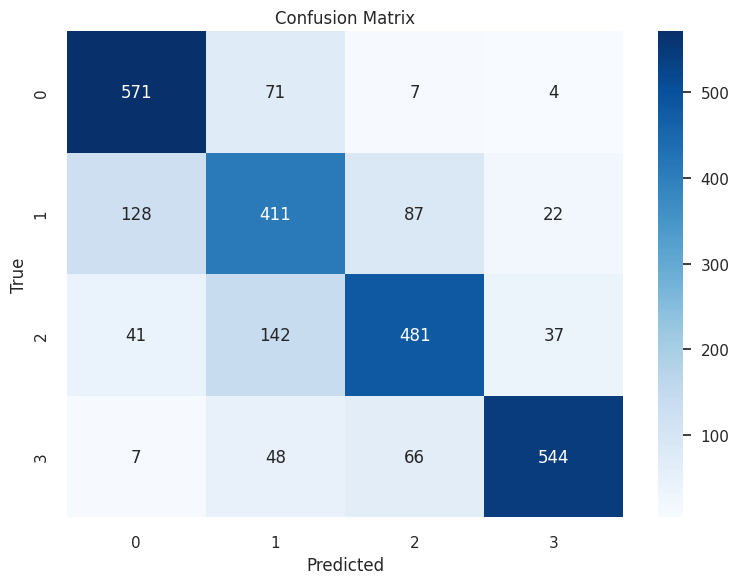

In [ ]:
cm = confusion_matrix(ytest, y_pred_xgb)

#Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate evaluation metrics for XGBoost model
predictions = [round(value) for value in y_pred_xgb]
accuracy_xgb = accuracy_score(ytest, predictions)
precision_xgb = precision_score(ytest, predictions, average='weighted')
recall_xgb = recall_score(ytest, predictions, average='weighted')
f1_xgb = f1_score(ytest, predictions, average='weighted')

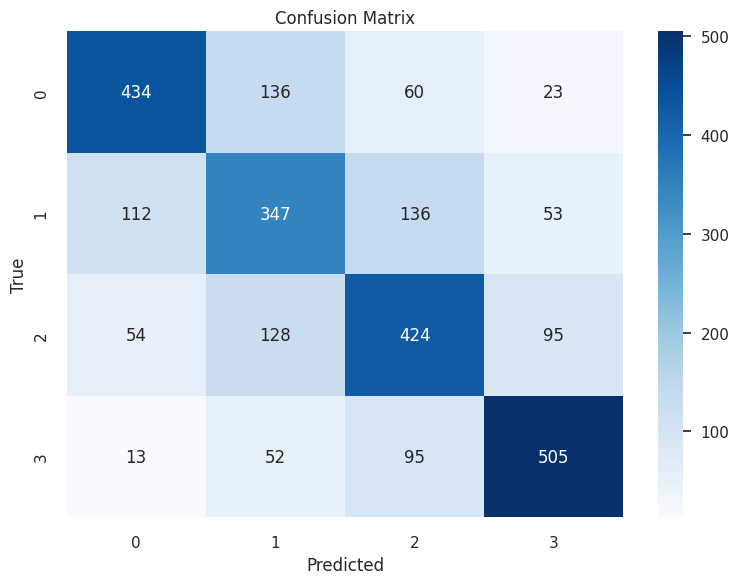

In [ ]:
cm = confusion_matrix(ytest, y_pred_dt)

#Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate evaluation metrics for Decision Tree model
predictions2 = [round(value) for value in y_pred_dt]
accuracy_dt = accuracy_score(ytest, predictions2)
precision_dt = precision_score(ytest, predictions2, average='weighted')
recall_dt = recall_score(ytest, predictions2, average='weighted')
f1_dt = f1_score(ytest, predictions2, average='weighted')

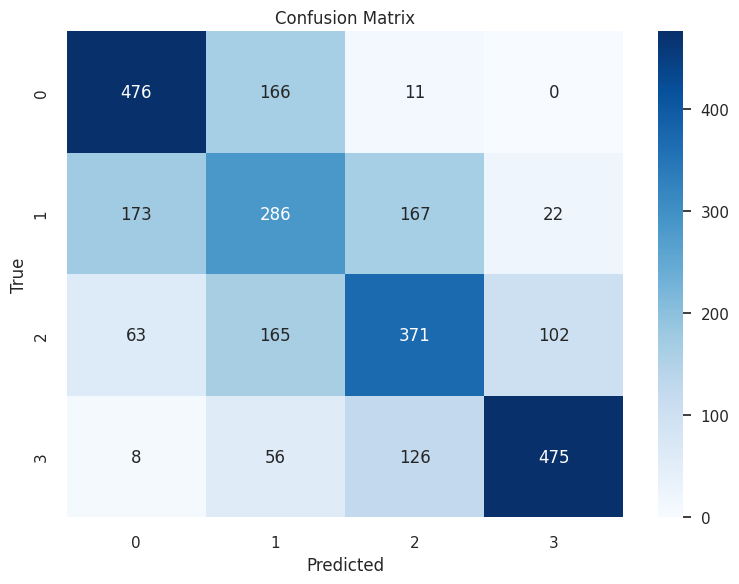

In [ ]:
cm = confusion_matrix(ytest, y_pred_svc)

#Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate evaluation metrics for Support Vector Machine model
predictions3 = [round(value) for value in y_pred_svc]
accuracy_svm = accuracy_score(ytest, predictions3)
precision_svm = precision_score(ytest, predictions3, average='weighted')
recall_svm = recall_score(ytest, predictions3, average='weighted')
f1_svm = f1_score(ytest, predictions3, average='weighted')

### 6.1 Model Evaluation Summary

Below is summary of the evaluation metrics that is used to evaluate each model. We can observe that the XGBoost model has the highest accuracy with 75.25%. This model also has 75.65%, 75.25% and 75.27% for precision, recall and F1-score respectively. All the values are higher than the other models which we can conclude the XGBoost is the best model in this body performance classificationt task.

Decision tree is the second best performing model among the 3 models, but all the evaluation metrics values are around 64% which is significantly lower than the XGBoost model.

The Support Vector Machine model has the lowest score for all the metrics which is around 60%.

In [ ]:
# Create a DataFrame to store the metrics
metrics = pd.DataFrame({
    'Model': ['XGBoost', 'Decision Tree', 'Support Vector Machine'],
    'Accuracy': ['{:.2%}'.format(accuracy_xgb), '{:.2%}'.format(accuracy_dt), '{:.2%}'.format(accuracy_svm)],
    'Precision': ['{:.2%}'.format(precision_xgb), '{:.2%}'.format(precision_dt), '{:.2%}'.format(precision_svm)],
    'Recall': ['{:.2%}'.format(recall_xgb), '{:.2%}'.format(recall_dt), '{:.2%}'.format(recall_svm)],
    'F1 Score': ['{:.2%}'.format(f1_xgb), '{:.2%}'.format(f1_dt), '{:.2%}'.format(f1_svm)]
})

# Format the table for better readability
metrics_table = metrics.style.hide_index().set_properties(**{'text-align': 'center'})
metrics_table = metrics_table.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]}
])

# Display the metrics table
display(metrics_table)

###6.2 Cross Validation results
Using the XGBoost model for cross validation since it has the highest accuracy, we further run cross validation with 3 fold and the accuracy from each fold is averaged as below. The accuracy is around 72% which is still within the good accuracy range. It does not seems we have overfitting issue.

In [ ]:
accuracy_scores = cross_val_score(XgbModel, xtrain, ytrain, cv=3)
accuracy_scores.mean()

0.7296587926509185

## 7 Model Optimization

The models above were trained and ran with the default parameters. In this section, we employed Bayesian optimization to search for the best parameters with minimal error in order to get better accuracy for our models.

### 7.1 Optimization Function

The objective function is first defined and the function will search for the best hyperparameters for our model using the Optuna package. It will return the result of 1 - accuracy and if the result is closer to 0, then the hyperparameters are better than the previous ones.

The process starts at optuna.create study where a study was created to manage the process. The study.optimze method is used and the objective function and the number of trials are passed as the arguements. This will initate the objective function. Once the process, the best parameters would be printed.

In [ ]:
def objective(trial):
    # Define the search space for the parameters
    params = {
        'objective': 'multi:softmax',
        'num_class': len(set(Class)),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }

    # Train the XGBoost model with the current set of parameters
    model = XGBClassifier(**params)
    model.fit(xtrain, ytrain)

    # Make predictions on the validation set
    y_pred = model.predict(xtest)

    # Calculate the accuracy
    accuracy = accuracy_score(ytest, y_pred)

    return 1.0 - accuracy

# Create a study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Print the best parameters and objective value
best_params = study.best_params
best_error = study.best_value
print('Best Parameters:', best_params)
print('Best Error:', best_error)


After the function above returns the best parameter with minimized error, the XGBoost model is retrained with the parameters.

In [ ]:
# Create an XGBoost classifier with the best parameters
model_best = XGBClassifier(**best_params)

# Train the model on the full training dataset
model_best.fit(xtrain, ytrain)

# Make predictions on a new dataset
y_pred_best = model_best.predict(xtest)

From the confusion matrix below, we are able to predict the classes more accurately using the new model:

Class A - 576 out of 760

Class B - 435 out of 666

Class C - 497 out of 628

Class D - 554 out of 613

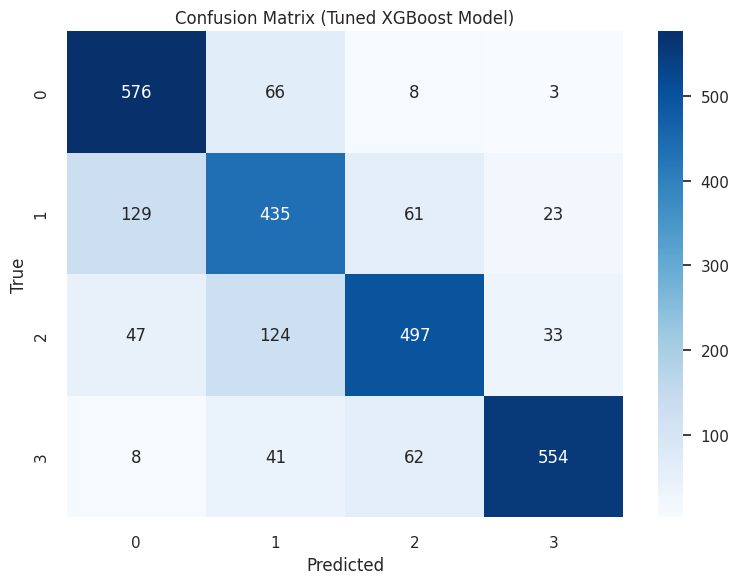

In [ ]:
cm = confusion_matrix(ytest, y_pred_best)

#Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Tuned XGBoost Model)')
plt.show()

predictions = [round(value) for value in y_pred_best]
accuracy_best = accuracy_score(ytest, predictions)
precision_best = precision_score(ytest, predictions, average='weighted')
recall_best = recall_score(ytest, predictions, average='weighted')
f1_best = f1_score(ytest, predictions, average='weighted')

After we have trained the XGBoost model with the best parameters, the same codes from before are used to calculate the evaluation metrics and compare them with the previous results. We can observe that the results from the improved model is slightly better than the old model with values around 77% for all the evaluation metrics while the previous values are around 75%.

In [ ]:
# Create a DataFrame to store the metrics
metrics = pd.DataFrame({
    'Model': ['XGBoost_new', 'XGBoost_old'],
    'Accuracy': ['{:.2%}'.format(accuracy_best),'{:.2%}'.format(accuracy_xgb) ],
    'Precision': ['{:.2%}'.format(precision_best),'{:.2%}'.format(precision_xgb) ],
    'Recall': ['{:.2%}'.format(recall_best),'{:.2%}'.format(recall_xgb)],
    'F1 Score': ['{:.2%}'.format(f1_best), '{:.2%}'.format(f1_xgb)]
})

# Format the table for better readability
metrics_table = metrics.style.hide_index().set_properties(**{'text-align': 'center'})
metrics_table = metrics_table.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]}
])

# Display the metrics table
display(metrics_table)

###7.2 Cross Validation results
Then, we also performed cross validation for the improved model and compare the accuracy results with the untuned model. We can see that the improved model still has higher accuracy than the previous model after the cross validation. The retrained model has accuracy around 74% and it is slightly higher than the previous model with around 72% acccuracy. We can conclude that the optimization method did obtain the better parameters for the XGBoost model.

In [ ]:
accuracy_scores1 = cross_val_score(model_best, xtrain, ytrain, cv=3)
accuracy_scores.mean()

metrics = pd.DataFrame({
    'Model': ['XGBoost_new', 'XGBoost_old'],
    'Accuracy': ['{:.2%}'.format(accuracy_scores1.mean()), '{:.2%}'.format(accuracy_scores.mean())],
})

# Format the table for better readability
metrics_table = metrics.style.hide_index().set_properties(**{'text-align': 'center'})
metrics_table = metrics_table.set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]}
])

# Display the metrics table
display(metrics_table)

Feature Importance from the best model


The feature_importances_ function in the code is used to determine the significance of a feature in the XGBoost model. This characteristic offers a numerical score that indicates the weighting of each feature in the model. Greater relevance is indicated by higher ratings. Using plt function, the features and its importance are plotted as bar plot for visualization.

According to the printed feature importance results, "sit and bend forward_cm" and "gender" are the two elements that are most crucial for determining body performance class which has values of 0.264 and 0.156 respectively. The classification also takes into account other elements like age, weight, body fat percentage, grip strength, and other physical parameters. Height and diastolic and systolic blood pressure data, however, had significantly lower significance scores, indicating a less significant influence on the classification of body performance.

age: 0.0853981152176857
gender: 0.15639044344425201
height_cm: 0.04018532484769821
weight_kg: 0.072477325797081
body fat_%: 0.06824633479118347
diastolic: 0.03173232823610306
systolic: 0.032643452286720276
gripForce: 0.05447830259799957
sit and bend forward_cm: 0.2644825577735901
sit-ups counts: 0.1419615000486374
broad jump_cm: 0.05200432986021042


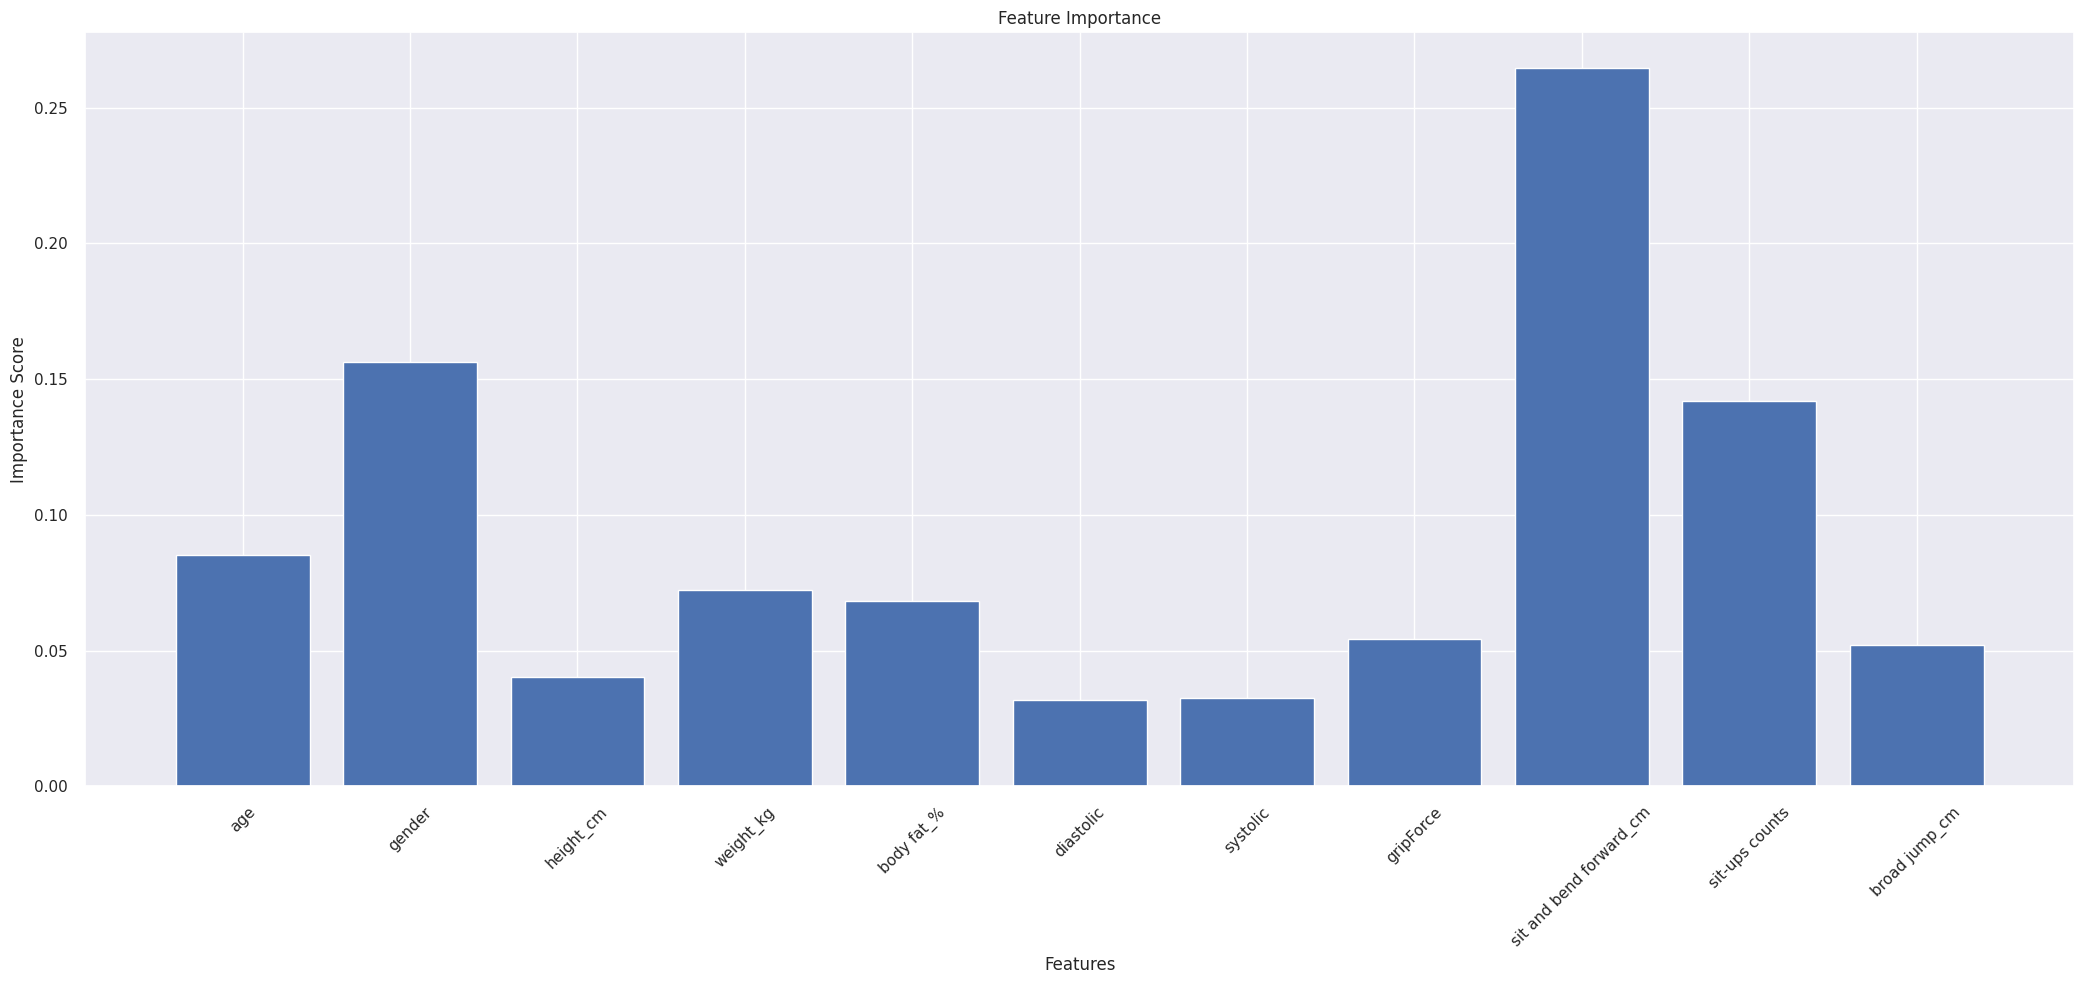

In [ ]:
importances = model_best.feature_importances_
for feature, importance in zip(xtrain.columns, importances):
    print(f"{feature}: {importance}")

plt.bar(xtrain.columns, importances)
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.tight_layout()

plt.show()

Export the Best Model

The following code uses the "pickle" library to export model. In our case, we exported the model with the highest accuracy which is the best performing model among others. The XgbModel model is saved in binary format using the pickle.dump(XgbModel, open('model.pkl', 'wb')) function. The model would be used for our deployment stage where the input data from the user would be used for the model and predict the body performance class.


In [ ]:
pickle.dump(model_best,open('model.pkl','wb'))

## 8. Deployment

The model is exported and is used for web application deployment. In order to have the framework of a web application, a simple web application is designed to askfor input from the users. The received inputs are then being used for our model to predict the user's body performance class. Flask libary was imported in the code. It is a web framework that provides libraries to build lightweight web applications in python. Below is the link to the web application.

https://wong21570.pythonanywhere.com/

## 9. Discussion & Conclusion

Overall, from EDA, we understand that there typically strong correlation between the variables that involves exercises count. Besides that these variables such as sit up counts, sit and bend forward exercise and broad jump has good correlation with body performance class. But, for the variables with exercises, the sit up counts and sit and bend forward variables affect the body class the most. Class A generally performs better in the variables that involves exercise counts while class D has lower values in variables with exercises.

The diastolic and systolic blood pressure has only litte correlation with body performance class. The weight and body fat percentage has more significance in affecting the body performance class. The age also play a role in affecting the body class, as the body performance is observed to be decreasing with increasing age.

In conclusion, with all these variables has relationship with the body performance class, we are able to train a predictive model to predict body class and deploy it as a platform for public use to check their body class. This would hopefully provide motivation to users to keep track of their body performance and keep improving until they reach peak body class or maintaining their body fitness.